In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
%matplotlib inline

In [3]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [6]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [9]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [14]:
pd.DataFrame(data=vec.fit_transform(data), columns=vec.get_feature_names_out())

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [25]:
sample = ['problem of eVil evil',
          'eVil Queen',
          'horizon problem']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [27]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,2,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.771006,0.000000,0.50689,0.385503,0.000000
1,0.605349,0.000000,0.00000,0.000000,0.795961
2,0.000000,0.795961,0.00000,0.605349,0.000000


In [29]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [32]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
X2 = imp.fit_transform(X)
X2

array([[3.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 6. , 6. ],
       [8. , 8. , 1. ]])

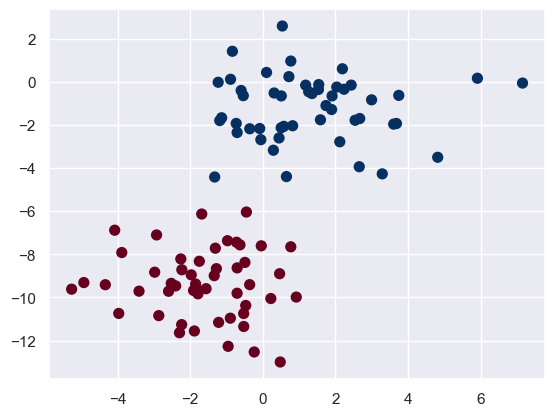

In [33]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [34]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [35]:
rng = np.random.RandomState(3)
Xnew =[-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

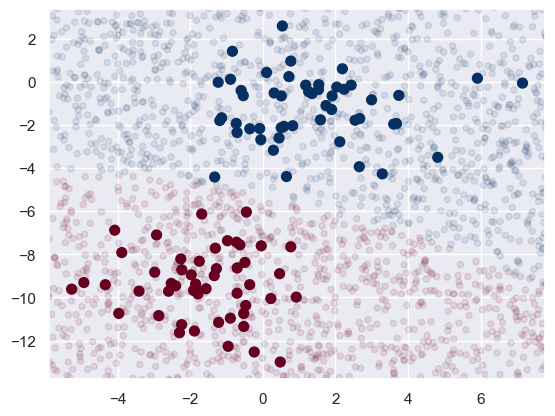

In [36]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [37]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(3)

array([[0.   , 1.   ],
       [0.   , 1.   ],
       [0.001, 0.999],
       [0.769, 0.231],
       [0.955, 0.045],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ]])

In [38]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

AttributeError: target_naems

In [40]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'sci.crypt','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

Input = [('trasf', TfidfVectorizer()), ('model', MultinomialNB())]

In [42]:
pipe = Pipeline(Input)

In [43]:
pipe.fit(train.data, train.target)
labels = pipe.predict(test.data)

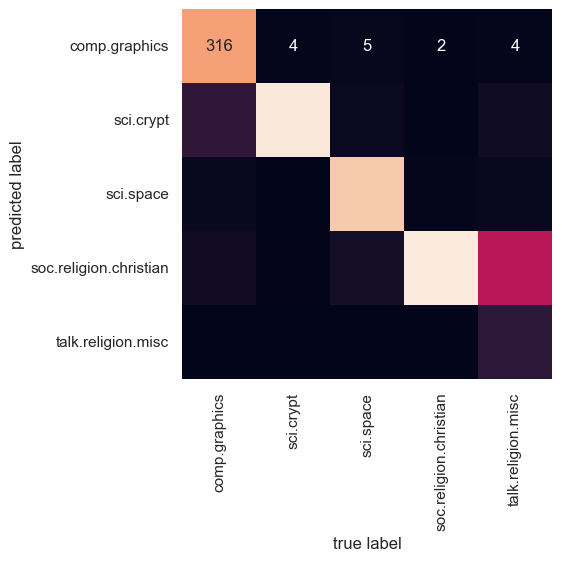

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [57]:
def predict2(s, train=train, model=pipe):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [61]:
predict2('Bitcoin debate!')

'sci.crypt'